In [1]:
import os
import pathlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
mpg = pd.read_csv("D:/MCA/DATA SCIENCE/DS LAB/mpg_raw.csv")

In [3]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
mpg.shape

(398, 9)

In [5]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [6]:
mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [7]:
mpg.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [8]:
mpg.fillna(value=104.469388,inplace=True)

In [9]:
mpg.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [10]:
mpg['displacement']=pd.Categorical(mpg['displacement'])
mpg['cylinders']=pd.Categorical(mpg['cylinders'])

(array([107.,  89.,  31.,  13.,  57.,   3.,  42.,  31.,  16.,   9.]),
 array([ 68. , 106.7, 145.4, 184.1, 222.8, 261.5, 300.2, 338.9, 377.6,
        416.3, 455. ]),
 <BarContainer object of 10 artists>)

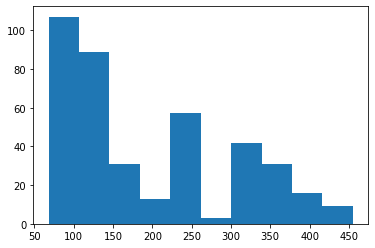

In [11]:
plt.hist(mpg['displacement'])

(array([ 6., 15., 50., 86., 92., 80., 45., 13.,  7.,  4.]),
 array([ 8.  ,  9.68, 11.36, 13.04, 14.72, 16.4 , 18.08, 19.76, 21.44,
        23.12, 24.8 ]),
 <BarContainer object of 10 artists>)

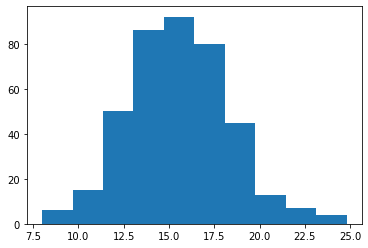

In [12]:
plt.hist(mpg['acceleration'])

In [13]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


<AxesSubplot:xlabel='cylinders', ylabel='model_year'>

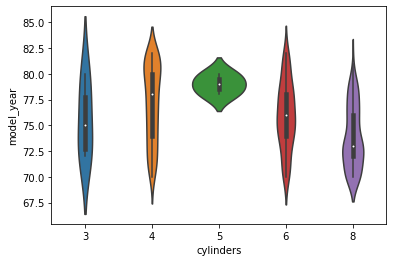

In [14]:
sns.violinplot(x='cylinders',y='model_year',data=mpg)

C:\Users\ALLOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='acceleration'>

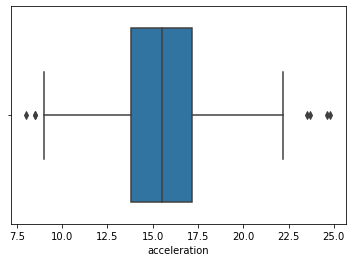

In [15]:
sns.boxplot(mpg['acceleration'])

In [16]:
Q1 = mpg['acceleration'].quantile(0.25)
Q3 = mpg['acceleration'].quantile(0.75)
IQR = Q3 - Q1
print("Q1: ",Q1,"\nQ3: ",Q3,"\nIQR: ",IQR)
Upper_Whisker = Q3 + (1.5*IQR)
Lower_Whisker = Q1 - (1.5*IQR)
print(Upper_Whisker,Lower_Whisker)

Q1:  13.825000000000001 
Q3:  17.175 
IQR:  3.3499999999999996
22.2 8.8


In [17]:
mpg=mpg[mpg['acceleration']<Upper_Whisker]
mpg=mpg[mpg['acceleration']>Lower_Whisker]


C:\Users\ALLOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='acceleration'>

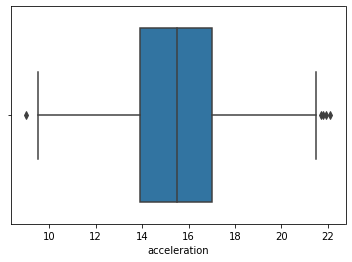

In [18]:
sns.boxplot(mpg['acceleration'])


In [19]:
nums = list(mpg.select_dtypes(exclude = ['object']).columns)
nums

['mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model_year']

In [20]:
continous = mpg.select_dtypes(include=['float64','int64']).columns
continous

Index(['mpg', 'horsepower', 'weight', 'acceleration', 'model_year'], dtype='object')

In [27]:
pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0.post9-py3-none-any.whl size=2362 sha256=65148a5b816f6584266c48544eb9ab30403c6ebc692048d7a73da3c39ea9f4d2
  Stored in directory: c:\users\allot\appdata\local\pip\cache\wheels\e2\4f\96\3b01e8981cb6f333764a2443a1f4777896180da6e46efe95c1
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [21]:
continous = mpg.select_dtypes(include=['float64','int64']).columns
continous

Index(['mpg', 'horsepower', 'weight', 'acceleration', 'model_year'], dtype='object')

In [30]:
from sklearn.preprocessing import StandardScaler

mpg[continous]=StandardScaler().fit_transform(mpg[continous])

In [24]:
import sklearn.preprocessing

<AxesSubplot:>

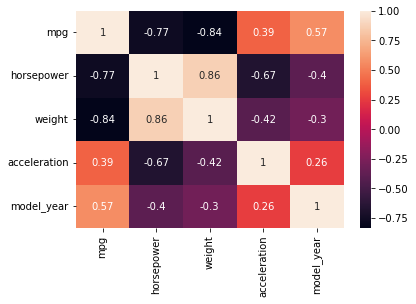

In [31]:
corr = mpg.corr()
sns.heatmap(corr,annot =True)